In [2]:
%load_ext autoreload
%autoreload 2
import tnetwork as tn
import tnetwork.DCD as DCD
from bokeh.plotting import figure, output_file, show
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas as pd
import seaborn as sns
from tnetwork.articles.experiments import *

import datetime

[autoreload of numpy failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.7/site-packages/numpy/__init__.py", line 188, in <module>
    __all__.remove('Ar

[autoreload of numpy.lib.npyio failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.7/site-packages/numpy/lib/npyio.py", line 26, in <module>
    from num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'matlab'

In [ ]:
#my_scenario = tn.ComScenario(random_noise=0.00,externalDensityPenalty=0.05,alpha=0.9)

my_scenario = tn.ComScenario(random_noise=0.00,externalDensityPenalty=0.25,alpha=0.9)


[to_merge,absorb,to_split,thes] = my_scenario.INITIALIZE([5,8,20,8],["to_merge","absorb","to_split","theseus"])
my_scenario.THESEUS(thes,wait=20)

absorbing = my_scenario.MERGE([to_merge,absorb],absorb.name(),t=30)

(split_large,splitted1) = my_scenario.SPLIT(to_split,["to_split","splitted1"],[15,5],t=75)
(splitted1,splitted2) = my_scenario.SPLIT(split_large,["to_split","splitted2"],[10,5],wait=40)
my_scenario.MERGE([splitted2,absorbing],absorbing.name(),wait=20)

born = my_scenario.BIRTH(5,t=25,name="resurgent_grow")
born = my_scenario.RESURGENCE(born,wait=10)
born = my_scenario.RESURGENCE(born,wait=10)
born = my_scenario.RESURGENCE(born,wait=10)

born = my_scenario.GROW_ITERATIVE(born,5,wait=4)
my_scenario.DEATH(born,wait=10)



In [49]:
(dyn_graph,dyn_com) = my_scenario.run()

100% (26 of 26) |########################| Elapsed Time: 0:00:00 ETA:  00:00:00

In [50]:
dyn_graph_sn = dyn_graph.to_DynGraphSN(slices=1)
GT_as_sn = dyn_com.to_DynCommunitiesSN(slices=1)



In [51]:
output_file("GT.html")
p = tn.plot_longitudinal(dyn_graph,dyn_com)
show(p)
export_png(p, filename="GT.png")
output_file("grpah.html")
p = tn.plot_as_graph(dyn_graph_sn,GT_as_sn,ts=1)
show(p)
export_png(p, filename="state0.png")



ig ['absorb', 'resurgent_grow', 'splitted1', 'splitted2', 'theseus', 'theseus_t_0001_0049', 'to_merge', 'to_split']


/Users/cazabetremy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


['absorb', 'resurgent_grow', 'splitted1', 'splitted2', 'theseus', 'theseus_t_0001_0049', 'to_merge', 'to_split']


'/Users/cazabetremy/Documents/GitHub/tnetwork/state0.png'

In [6]:
#run_all_algos(methods,dyn_graph_sn,plot=True)
coms = dynmoga(dyn_graph_sn)

{'n_t_0000_0038': 1, 'n_t_0000_0032': 2, 'n_t_0000_0028': 3, 'n_t_0001_0046': 4, 'n_t_0000_0005': 5, 'n_t_0000_0039': 6, 'n_t_0000_0000': 7, 'n_t_0000_0031': 8, 'n_t_0001_0041': 9, 'n_t_0000_0033': 10, 'n_t_0000_0004': 11, 'n_t_0000_0006': 12, 'n_t_0000_0017': 13, 'n_t_0001_0056': 14, 'n_t_0000_0001': 15, 'n_t_0000_0019': 16, 'n_t_0000_0009': 17, 'n_t_0000_0021': 18, 'n_t_0000_0026': 19, 'n_t_0000_0037': 20, 'n_t_0001_0058': 21, 'n_t_0001_0044': 22, 'n_t_0000_0012': 23, 'n_t_0001_0042': 24, 'n_t_0001_0057': 25, 'n_t_0000_0035': 26, 'n_t_0000_0013': 27, 'n_t_0001_0047': 28, 'n_t_0000_0016': 29, 'n_t_0000_0011': 30, 'n_t_0001_0054': 31, 'n_t_0000_0022': 32, 'n_t_0000_0025': 33, 'n_t_0000_0040': 34, 'n_t_0001_0048': 35, 'n_t_0001_0052': 36, 'n_t_0001_0053': 37, 'n_t_0000_0034': 38, 'n_t_0001_0043': 39, 'n_t_0001_0055': 40, 'n_t_0001_0051': 41, 'n_t_0000_0029': 42, 'n_t_0000_0002': 43, 'n_t_0000_0003': 44, 'n_t_0000_0008': 45, 'n_t_0001_0059': 46, 'n_t_0000_0007': 47, 'n_t_0000_0020': 48, 

In [7]:
#output_file("DYNMO.html")
p = tn.plot_longitudinal(dyn_graph_sn,coms)
#show(p)
export_png(p, filename="DYNMO.png")

/Users/cazabetremy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


'/Users/cazabetremy/Documents/GitHub/tnetwork/DYNMO.png'

In [11]:
dyn_graph_sn = dyn_graph.to_DynGraphSN(slices=1)
GT_as_sn = dyn_com.to_DynCommunitiesSN(slices=1)


In [12]:
output_file("GT.html")
p = tn.plot_longitudinal(dyn_graph_sn,GT_as_sn)
show(p)

/Users/cazabetremy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [18]:
output_file("Graph.html")
p = tn.plot_as_graph(dyn_graph_sn,GT_as_sn,ts=10)
show(p)

/Users/cazabetremy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [24]:
del methods_to_test["survival_graph"]
(dyn_graph,dyn_com) = generate_graph(nb_com =5,min_size=4,max_size=15,operations=100)
dyn_graph_sn = dyn_graph.to_DynGraphSN(slices=1)
GT_as_sn = dyn_com.to_DynCommunitiesSN(slices=1)

df_stats = None
for steps in [50,100,200,400,800,1600,3200,6400]:
    subgraph,subcomsGT =subset(dyn_graph_sn,GT_as_sn,steps)

    for iteration in range(1):
        result = run_all_algos(methods_to_test,subgraph)
        stats = compute_all_stats(result,subcomsGT,subgraph,iteration,detailed=False)
        if steps==50:
            df_stats=stats
        else:
            df_stats = pd.concat([df_stats,stats])
    
    



  9% (9 of 100) |##                      | Elapsed Time: 0:00:00 ETA:   0:00:01

generating graph with nb_com =  5


100% (100 of 100) |######################| Elapsed Time: 0:00:07 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
start iterative_match, version: louvain
end iterative_match
start dynamo

In [26]:
df_stats

,names,times,nb_changes,similarity,entropies,modularities,onmis,nb_nodes,nb_steps,iteration
0,iterative,0.272981,19,1.000000,1.516088,0.592809,0.978211,44,50,0
1,dynamo,0.622677,50,1.000000,1.476112,0.589111,0.936652,44,50,0
2,smoothed_louvain,0.208765,8,1.000000,1.497452,0.594227,0.990465,44,50,0
3,mucha,0.278645,45,1.000000,1.662918,0.592950,0.964337,44,50,0
0,iterative,0.272218,39,0.892359,1.438191,0.530118,0.980315,44,100,0
1,dynamo,0.587756,147,0.892359,1.452317,0.527534,0.940521,44,100,0
2,smoothed_louvain,0.341413,20,0.882652,1.404773,0.530457,0.990591,44,100,0
3,mucha,0.436707,50,0.976339,1.428893,0.529445,0.976820,44,100,0
0,iterative,0.504607,209,0.928200,1.668996,0.517623,0.969596,44,200,0
1,dynamo,0.829587,340,0.928200,1.673270,0.515229,0.940831,44,200,0


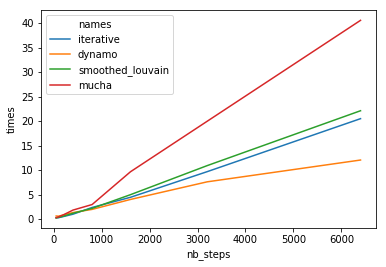

In [27]:
ax = sns.lineplot(x="# steps", y="running time", hue="algorithm",data=df_stats)



# Scalabitlity according to nb_com

In [29]:
methods_to_test = standard_methods_to_test()
del methods_to_test["mucha"]


#del methods_to_test["survival_graph"]
#methods_to_test={"DYNMOGA":dynmoga}
df_stats = None
parameters = [3,10,50,100,150]
parameters=[200]
param_name="nb nodes"
#for nb_com in ncoms:
#    (subgraph,subcomsGT) = generate_graph(nb_com,4,15,nb_com*2)
#    dyn_graph_sn = subgraph.to_DynGraphSN(slices=1)
#    GT_as_sn = subcomsGT.to_DynCommunitiesSN(slices=1)

#    for iteration in range(2):
#        subgraph,subcomsGT =subset(dyn_graph_sn,GT_as_sn,50)
#        result = run_all_algos(methods_to_test,subgraph)
#        stats = compute_all_stats(result,subcomsGT,subgraph,iteration)
#        if nb_com==ncoms[0]:
#            df_stats=stats
#        else:
#            df_stats = pd.concat([df_stats,stats])
saved_coms={}
for parameter in parameters:
    print("----",parameter)
    (dyn_graph,GT) = generate_graph(parameter,5,15,20)
    #(dyn_graph,GT) = generate_graph(10,5,10,20,mu=mu)

    dyn_graph_sn = dyn_graph.to_DynGraphSN(slices=1)
    GT_as_sn = GT.to_DynCommunitiesSN(slices=1)
    subgraph,subcomsGT =subset(dyn_graph_sn,GT_as_sn,50)
    
    for iteration in range(2):
            ID = (parameter,iteration)
            saved_coms[ID]={}
            saved_coms[ID]["ID"]={param_name:ID[0]*10,"iteration":ID[1]}
            print(iteration)

            #subgraph = dyn_graph_sn
            #subcomsGT = GT_as_sn

            saved_coms[ID]["graph"]=subgraph
            saved_coms[ID]["GT"]=subcomsGT


            result = run_all_algos(methods_to_test,subgraph)
            saved_coms[ID]["result"]=result

df_stats = compute_all_stats(saved_coms,detailed=False)
            
globalID=datetime.datetime.now().strftime("%m-%d-%Y:%I:%M%p")
df_stats.to_csv("by_nb_com"+str(globalID))

pas de mucha
---- 200
generating graph with nb_com =  200


KeyboardInterrupt: 

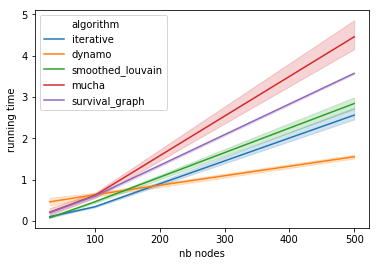

In [3]:
ax = sns.lineplot(x=param_name, y="running time", hue="algorithm",data=df_stats)


# Test scalability by aggregation

In [57]:
(dyn_graph,dyn_com) = generate_graph(6,4,15,100)
dyn_graph = dyn_graph.to_DynGraphSN(slices=1)
dyn_com = dyn_com.to_DynCommunitiesSN(slices=1)

for aggreg in [1,5,50,100]:
    dyn_graph_aggreg = dyn_graph.aggregate_sliding_window(aggreg)
    subgraph,_ =subset(dyn_graph_aggreg,dyn_com,50)



    for _ in range(5):
        result = run_all_algos(methods_to_test,subgraph)
        stats = compute_all_stats(result,None,subgraph,aggreg,detailed=False)
        if aggreg==1:
            df_stats=stats
        else:
            df_stats = pd.concat([df_stats,stats])

  6% (6 of 100) |#                       | Elapsed Time: 0:00:00 ETA:   0:00:02

generating graph with nb_com =  6


100% (100 of 100) |######################| Elapsed Time: 0:00:04 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
start iterative_match, version: louvain
end iterative_match
start dynamo

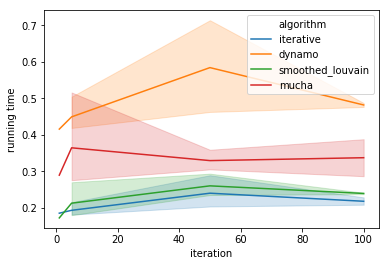

In [59]:
ax = sns.lineplot(x="iteration", y="running time", hue="algorithm",data=df_stats)



In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import tnetwork
from tnetwork.articles.experiments import *
import seaborn as sns
import pickle
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Computing community qualities

In [ ]:
df_stats = None
saved_coms = {}
methods_to_test = standard_methods_to_test()
#del methods_to_test["survival_graph"]
#methods_to_test = {"dynmoga":dynmoga}
mus = [0,0.05]+[0.1,0.15,0.2]+[0.3,0.4,0.5]
#mus = [0.3,0.4]
for mu in mus:
    print("----",mu)
#for mu in [0,0.25]:
    #(dyn_graph,GT) = generate_graph(10,5,20,30,mu=mu)


    for iteration in range(4):
        ID = (mu,iteration)
        saved_coms[ID]={}
        saved_coms[ID]["ID"]={"mu":ID[0],"iteration":ID[1]}
        print(iteration)
        (dyn_graph,GT) = generate_graph(10,5,15,20,mu=mu)
        #(dyn_graph,GT) = generate_graph(10,5,10,20,mu=mu)


        dyn_graph_sn = dyn_graph.to_DynGraphSN(slices=1)
        GT_as_sn = GT.to_DynCommunitiesSN(slices=1)
        
        #subgraph,subcomsGT =subset(dyn_graph_sn,GT_as_sn,50)
        subgraph = dyn_graph_sn
        subcomsGT = GT_as_sn
        
        saved_coms[ID]["graph"]=subgraph
        saved_coms[ID]["GT"]=subcomsGT


        result = run_all_algos(methods_to_test,subgraph)
        saved_coms[ID]["result"]=result
        #
        #if mu==mus[0]:
        #    df_stats=stats
        #else:
        #    df_stats = pd.concat([df_stats,stats])

pas de mucha
---- 0
0
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:03 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 55% (11 of 20) |#############           | Elapsed Time: 0:00:00 ETA:   0:00:00

1
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:00 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


N/A% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

2
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 30% (6 of 20) |#######                  | Elapsed Time: 0:00:00 ETA:   0:00:00

3
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 20% (4 of 20) |#####                    | Elapsed Time: 0:00:00 ETA:  00:00:00

---- 0.05
0
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 20% (4 of 20) |#####                    | Elapsed Time: 0:00:00 ETA:   0:00:00

1
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:02 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 30% (6 of 20) |#######                  | Elapsed Time: 0:00:00 ETA:   0:00:00

2
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


N/A% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

3
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:04 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:  00:00:00

---- 0.1
0
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

1
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 20% (4 of 20) |#####                    | Elapsed Time: 0:00:00 ETA:  00:00:00

2
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 30% (6 of 20) |#######                  | Elapsed Time: 0:00:00 ETA:  00:00:00

3
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

---- 0.15
0
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:  00:00:00

1
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:  00:00:00

2
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:02 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 20% (4 of 20) |#####                    | Elapsed Time: 0:00:00 ETA:  00:00:00

3
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:01 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


 20% (4 of 20) |#####                    | Elapsed Time: 0:00:00 ETA:   0:00:00

---- 0.2
0
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:05 ETA:  00:00:00

start iterative_match, version: louvain
end iterative_match
start dynamo
run dynamo java code
dynamo java code run
start iterative_match, version: smoothedLouvain
end iterative_match
INITIALISING MMUCHA 
sucessfully finished MUCHA 
starting survival graph method 


N/A% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

1
generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:08 ETA:  00:00:00

start iterative_match, version: louvain


In [ ]:
import datetime
globalID=datetime.datetime.now().strftime("%m-%d-%Y:%I:%M%p")
pickle.dump(saved_coms,open("saved_coms"+str(globalID),"wb"))


In [ ]:
df_stats = compute_all_stats(saved_coms)

In [ ]:
df_stats

In [ ]:
globalID=datetime.datetime.now().strftime("%m-%d-%Y:%I:%M%p")


df_stats.to_csv("data"+str(globalID))

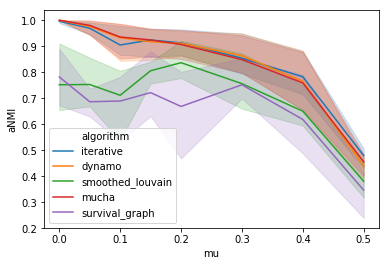

In [62]:
carac = "aNMI"
ax = sns.lineplot(x="mu", y=carac, hue="algorithm",data=df_stats)



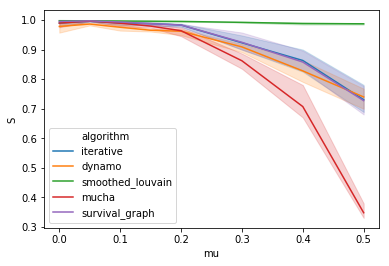

In [68]:
import matplotlib.pyplot as plt

for carac in ["aNMI","Q","LaNMI","LF1","LARI","M","I","S"]:
    plt.clf()
    ax = sns.lineplot(x="mu", y=carac, hue="algorithm",data=df_stats)
    ax.get_figure().savefig(carac+".pdf")

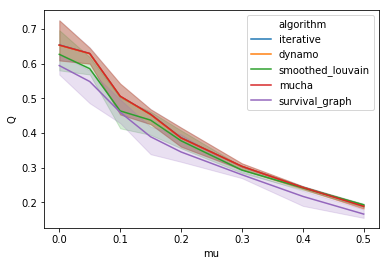

In [45]:
ax = sns.lineplot(x="mu", y="Q", hue="algorithm",data=df_stats)



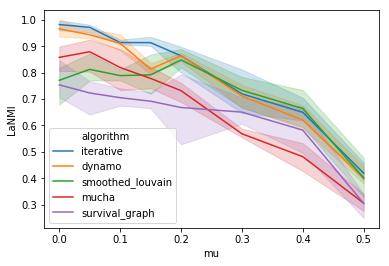

In [46]:
ax = sns.lineplot(x="mu", y="LaNMI", hue="algorithm",data=df_stats)



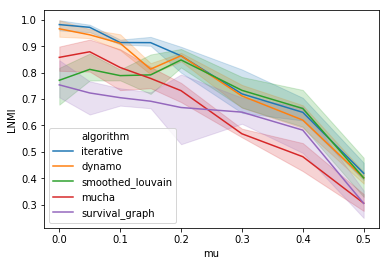

In [47]:
ax = sns.lineplot(x="mu", y="LNMI", hue="algorithm",data=df_stats)



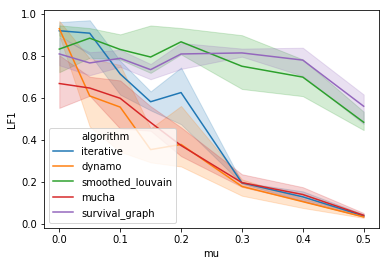

In [48]:
ax = sns.lineplot(x="mu", y="LF1", hue="algorithm",data=df_stats)




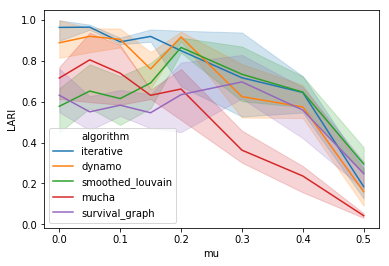

In [49]:
ax = sns.lineplot(x="mu", y="LARI", hue="algorithm",data=df_stats)



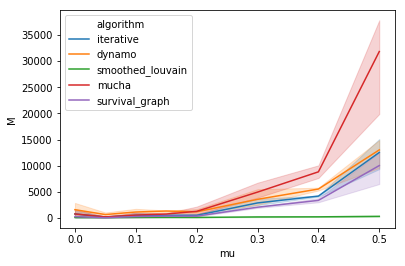

In [50]:
ax = sns.lineplot(x="mu", y="M", hue="algorithm",data=df_stats)



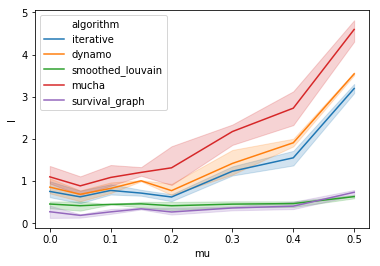

In [51]:
ax = sns.lineplot(x="mu", y="I", hue="algorithm",data=df_stats)



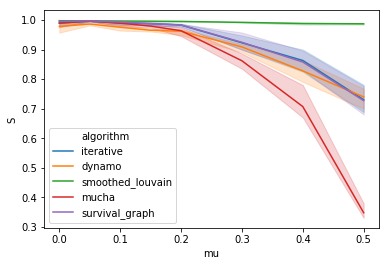

In [67]:
ax = sns.lineplot(x="mu", y="S", hue="algorithm",data=df_stats)



In [59]:
output_file("test2.html")

chosen_xp = saved_coms[(0.5, 2)]
p = tn.plot_longitudinal(chosen_xp["graph"],chosen_xp["result"]["iterative"][0])
show(p)

/Users/cazabetremy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [58]:
output_file("gt.html")

chosen_xp = saved_coms[(0.5, 2)]


p = tn.plot_longitudinal(chosen_xp["graph"],chosen_xp["GT"])
show(p)

/Users/cazabetremy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [17]:
result["iterative"]

(<tnetwork.dyn_community.communities_dyn_sn.DynCommunitiesSN at 0x12e446080>,
 {'CD': 6.86433482170105,
  'match': 0.5079431533813477,
  'total': 7.372320890426636})

In [55]:
saved_coms[(0.5, 2)]["graph"]

In [54]:
saved_coms.keys()

dict_keys([(0, 0), (0, 1), (0, 2), (0.05, 0), (0.05, 1), (0.05, 2), (0.1, 0), (0.1, 1), (0.1, 2), (0.15, 0), (0.15, 1), (0.15, 2), (0.2, 0), (0.2, 1), (0.2, 2), (0.3, 0), (0.3, 1), (0.3, 2), (0.4, 0), (0.4, 1), (0.4, 2), (0.5, 0), (0.5, 1), (0.5, 2)])

In [8]:
from os import listdir
from os.path import isfile, join
mypath = "saved"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
all_pds = []
for fil in onlyfiles:
    if "data" in fil:
        a_pd = pd.read_csv("saved/"+fil)
        a_pd["file"]=fil
        all_pds.append(a_pd)
        print(len(a_pd))
df_stats = pd.concat(all_pds)

40
36
120
92
160
36
160


/Users/cazabetremy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [21]:
df_stats[df_stats["algorithm"]=="iterative"]

,# nodes,# steps,I,I_old,LARI,LF1,LNMI,LaNMI,M,ONMI,Q,S,Unnamed: 0,aNMI,algorithm,file,iteration,mu,running time,SM-M
0,101,1019,0.674273,NaN,1.000000,1.000000,1.000000,1.000000,229,NaN,0.678204,0.997098,0,1.000000,iterative,data07-23-2019:05:47PM,0,0.00,5.504806,1.624113
5,101,1019,0.553128,NaN,0.919342,0.669091,0.932151,0.932151,218,NaN,0.585739,0.996623,5,0.901392,iterative,data07-23-2019:05:47PM,0,0.05,7.362163,1.546099
10,101,1019,0.550885,NaN,0.981734,0.966667,0.978072,0.978072,211,NaN,0.520615,0.994261,10,0.988282,iterative,data07-23-2019:05:47PM,0,0.10,6.058471,1.496454
15,101,1019,0.570840,NaN,0.872794,0.321389,0.890651,0.890651,727,NaN,0.452766,0.986825,15,0.895576,iterative,data07-23-2019:05:47PM,0,0.15,7.022233,5.156028
20,101,1019,0.850828,NaN,0.895575,0.572727,0.897561,0.897561,793,NaN,0.385853,0.984775,20,0.924334,iterative,data07-23-2019:05:47PM,0,0.20,10.405177,5.624113
25,101,1019,0.827244,NaN,0.828910,0.205102,0.757145,0.757145,1892,NaN,0.313942,0.947021,25,0.854211,iterative,data07-23-2019:05:47PM,0,0.30,11.242596,13.418440
30,101,1019,2.104031,NaN,0.389750,0.083118,0.536183,0.536183,5924,NaN,0.239701,0.782876,30,0.695182,iterative,data07-23-2019:05:47PM,0,0.40,8.948156,42.014184
35,101,1019,2.296522,NaN,0.213002,0.065963,0.469829,0.469829,9966,NaN,0.194658,0.789816,35,0.491381,iterative,data07-23-2019:05:47PM,0,0.50,23.075630,70.680851
0,104,793,0.574985,2.035211,0.929581,0.616316,0.931953,0.930990,362,0.991637,0.541150,NaN,0,NaN,iterative,data1,3,0.10,4.961691,2.567376
4,100,900,0.551109,1.797488,0.779175,0.634118,0.857883,0.854811,341,0.993878,0.453097,NaN,0,NaN,iterative,data1,0,0.15,6.034187,2.418440


In [24]:
to_normalize = "I"
min_M = min(df_stats[(df_stats["algorithm"]=="iterative") & (df_stats["mu"]==0.0)][to_normalize])
df_stats["SM-"+to_normalize]=df_stats[to_normalize]/min_M

In [ ]:
import matplotlib.pyplot as plt

for carac in ["aNMI","Q","LaNMI","LF1","LARI","M","SM-M","I","S"]:
    plt.clf()
    ax = sns.lineplot(x="mu", y=carac, hue="algorithm",data=df_stats)
    ax.get_figure().savefig(carac+".pdf")

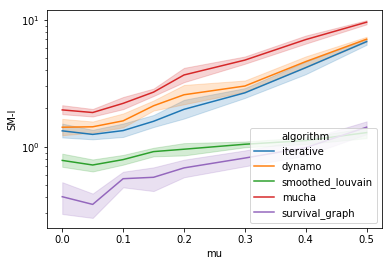

In [26]:

    
for carac in ["SM-M","SM-I"]:
    plt.clf()
    ax = sns.lineplot(x="mu", y=carac, hue="algorithm",data=df_stats)
    ax.set_yscale('log')
    ax.get_figure().savefig(carac+".pdf")
    #ax = g.ax_joint
    #ax.set_xscale('log')


In [26]:
from os import listdir
from os.path import isfile, join
mypath = "saved"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
all_pds = []
for fil in onlyfiles:
    if "by_nb" in fil:
        a_pd = pd.read_csv("saved/"+fil)
        a_pd["file"]=fil
        all_pds.append(a_pd)
        print(len(a_pd))
df_stats = pd.concat(all_pds)

50
5
5
5
2
4
4
10
75
72
3


/Users/cazabetremy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


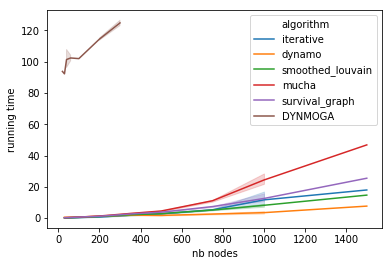

In [27]:
ax = sns.lineplot(x=param_name, y="running time", hue="algorithm",data=df_stats)

